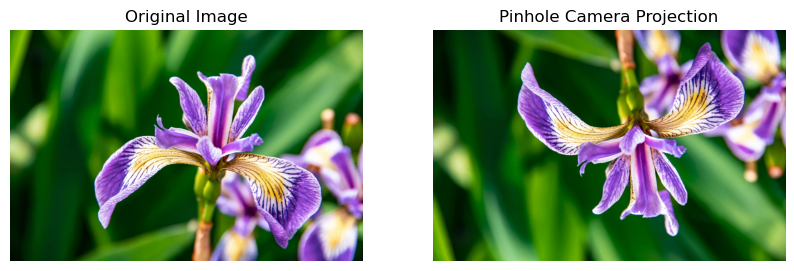

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initial pinhole camera model
# Takes the original image and flips it, but does not change pixel values

# Load the image in color
image_path = 'iris-1.jpg'  # Provide the correct path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if image is None:
    raise ValueError("Image not found or cannot be loaded.")

# Convert BGR to RGB for correct color representation
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = image.shape

# Create an output image (simulating an inverted projection)
projected_image = np.zeros_like(image)

# Simulate pinhole projection (simple inversion)

projected_image = cv2.flip(image, 0)  # Invert image to simulate pinhole projection

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pinhole Camera Projection")
plt.imshow(projected_image)
plt.axis("off")

plt.show()


This is the simpliest pinhole camera model possible. The original image is flipped to replicate the inversion found in cameras.

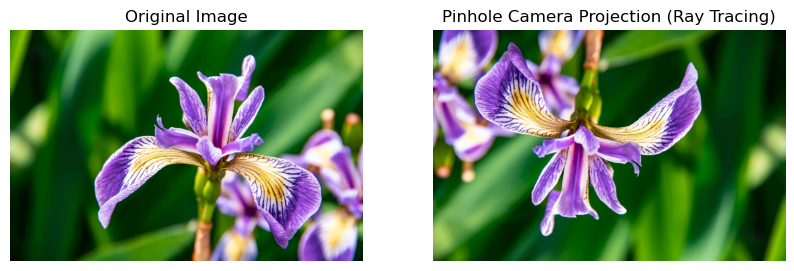

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pinhole camera model with ray "dummy" ray tracing
# Takes the original image, directly assigns each pixel value to the projected image
# Flips it, but does not change pixel values
# Essentially a one-to-one "ray" raced from the input pixel to the output pixel
# No physics is added to alter the rays

def pinhole_ray_tracing(image, focal_length=50):
    # Load the image in color
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    
    # Create an output image (simulating pinhole projection)
    projected_image = np.zeros_like(image)
    
    # Perform ray tracing-based projection
    for y in range(height):
        for x in range(width):
            # Calculate projected coordinates
            proj_x = int(width - x - 1)
            proj_y = int(height - y - 1)
            
            # Ensure coordinates are within bounds
            if 0 <= proj_x < width and 0 <= proj_y < height:
                projected_image[proj_y, proj_x] = image[y, x]
    
    return projected_image

# Load image
image_path = 'iris-1.jpg'  # Provide the correct path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if image is None:
    raise ValueError("Image not found or cannot be loaded.")

# Simulate pinhole camera with ray tracing
projected_image = pinhole_ray_tracing(image)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pinhole Camera Projection (Ray Tracing)")
plt.imshow(projected_image)
plt.axis("off")

plt.show()


Here we have spoofed a ray tracer by assigning each pixel value directly from the input to output image. Basically, each pixel is a 'ray' sending its intitial information over to the corresponding output pixel.

Execution Time: 5.4650 seconds


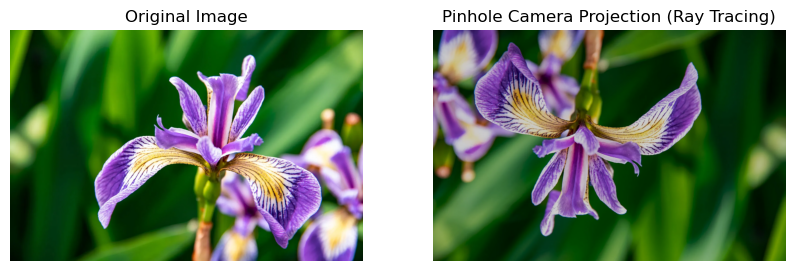

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

# Pinhole camera model with ray "dummy" ray tracing
# Takes the original image, directly assigns each pixel value to the projected image
# Flips it, but does not change pixel values
# Essentially a one-to-one "ray" raced from the input pixel to the output pixel
# No physics is added to alter the rays

def pinhole_ray_tracing(image, focal_length=50):
    # Load the image in color
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    
    # Create an output image (simulating pinhole projection)
    projected_image = np.zeros_like(image)
    
    # Perform ray tracing-based projection
    for y in range(height):
        for x in range(width):
            # Calculate projected coordinates
            proj_x = int(width - x - 1)
            proj_y = int(height - y - 1)
            
            # Ensure coordinates are within bounds
            if 0 <= proj_x < width and 0 <= proj_y < height:
                projected_image[proj_y, proj_x] = image[y, x]*0.8
    
    return projected_image

# Load image
image_path = 'iris-1.jpg'  # Provide the correct path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if image is None:
    raise ValueError("Image not found or cannot be loaded.")

# Simulate pinhole camera with ray tracing
# Time the execution
start_time = time.time()
projected_image = pinhole_ray_tracing(image)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pinhole Camera Projection (Ray Tracing)")
plt.imshow(projected_image)
plt.axis("off")

plt.show()

Here we've added super simple physics through a dimming factor of 0.8. Notice the runtime compared to the prior models. Even with super super simple physics, ray tracing costs us a lot of processing time.

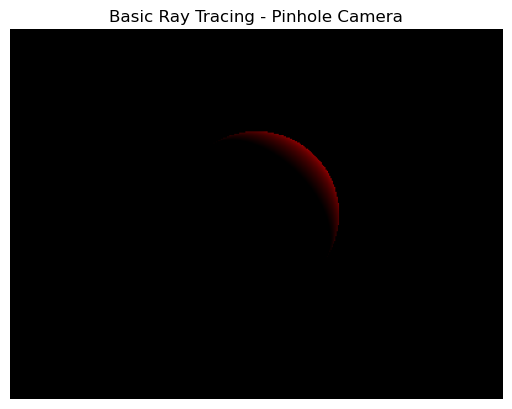

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Scene setup
def intersect_sphere(ray_origin, ray_dir, sphere_center, sphere_radius):
    oc = ray_origin - sphere_center
    a = np.dot(ray_dir, ray_dir)
    b = 2.0 * np.dot(oc, ray_dir)
    c = np.dot(oc, oc) - sphere_radius**2
    discriminant = b**2 - 4*a*c
    
    if discriminant < 0:
        return np.inf  # No intersection
    
    t1 = (-b - np.sqrt(discriminant)) / (2.0 * a)
    t2 = (-b + np.sqrt(discriminant)) / (2.0 * a)
    
    return t1 if t1 > 0 else t2 if t2 > 0 else np.inf

# Render settings
width, height = 400, 300
aspect_ratio = width / height
fov = np.pi / 3  # 60 degrees
camera_origin = np.array([0, 0, 1])
sphere_center = np.array([0, 0, -3])
sphere_radius = 1.0
light_dir = np.array([1, 1, -1]) / np.linalg.norm([1, 1, -1])  # Light direction

image = np.zeros((height, width, 3))

# Ray tracing loop
for y in range(height):
    for x in range(width):
        pixel_x = (2 * (x + 0.5) / width - 1) * np.tan(fov / 2) * aspect_ratio
        pixel_y = (1 - 2 * (y + 0.5) / height) * np.tan(fov / 2)
        ray_dir = np.array([pixel_x, pixel_y, -1])
        ray_dir /= np.linalg.norm(ray_dir)
        
        t = intersect_sphere(camera_origin, ray_dir, sphere_center, sphere_radius)
        if t < np.inf:
            hit_point = camera_origin + t * ray_dir
            normal = (hit_point - sphere_center) / sphere_radius
            brightness = max(0, np.dot(normal, light_dir))
            image[y, x] = np.array([1, 0, 0]) * brightness  # Red sphere

# Display the rendered image
plt.imshow(np.clip(image, 0, 1))
plt.axis('off')
plt.title("Basic Ray Tracing - Pinhole Camera")
plt.show()


Here we've created our first *actual* ray tracer, in which we can change the object being imaged and the lighting conditions. Notice it is much faster than our much stupider version. There is a lot of optimization that goes into camera modeling and ray tracing.